# EnMap vs EnMap 23. April 2025

In [22]:
import sys
!{sys.executable} -m pip install spectral

## picture 1

[0.04448604 0.04083    0.03512271 0.03740713 0.03812331 0.03866877
 0.03977033 0.03889558 0.03761634 0.03690603 0.03562144 0.03446497
 0.03303429 0.03140078 0.02858682 0.0287405  0.02789264 0.02567189
 0.02526451 0.02423917 0.02206821 0.02190345 0.02178715 0.02096841
 0.02016849 0.01918763 0.01868313 0.01821808 0.01728106 0.01630152
 0.01580366 0.01499719 0.0144119  0.01407991 0.01312585 0.01262283
 0.01210946 0.01151209 0.01105634 0.01053577 0.01023278 0.00962591
 0.00950878 0.00925307 0.0087344  0.00823833 0.00794993 0.00781581
 0.00754836 0.00722225 0.00628877 0.00598872 0.00605072 0.00576519
 0.00538778 0.00463506 0.0043229  0.00435839 0.0041796  0.00400431
 0.00347465 0.00219666 0.00319827 0.00329526 0.00313729 0.00296415]
(43, 66)


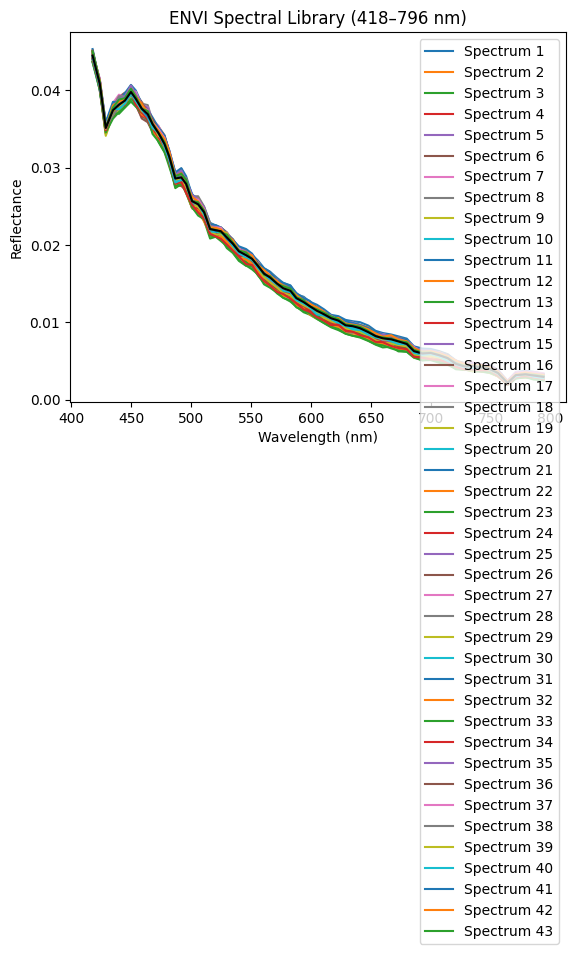

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np

spectra = spectral.io.envi.open('../data/20_04_2025_toA.hdr', '../data/20_04_2025_toA.sli')
data = spectra.spectra  # (n_spectra x n_bands)

# Hent wavelengths (i µm) og konverter til nm
header = spectral.envi.read_envi_header('../data/20_04_2025_toA.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]

# Filtrer basert på ønsket bølgelengdeintervall
min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]

# Bruk masken til å filtrere både data og wavelengths
filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  

median_data = np.median(np.array(filtered_data), axis = 0)
print(median_data)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data[i], label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()


## Picture 2

[0.04983694 0.04553785 0.03970493 0.04189539 0.04275659 0.0428682
 0.04394337 0.04284852 0.04149256 0.0407711  0.03927737 0.03793254
 0.03645201 0.03433287 0.03163838 0.03169705 0.03060229 0.02828727
 0.02771659 0.02642138 0.02402616 0.02374944 0.02345569 0.02255863
 0.02161589 0.02039477 0.01984423 0.01921334 0.01810895 0.01709303
 0.0165269  0.01560289 0.01504557 0.01469712 0.01372808 0.01316563
 0.01257971 0.01185744 0.01132629 0.01082259 0.01046272 0.00992943
 0.00975547 0.00942713 0.009003   0.00845974 0.00816699 0.00793745
 0.0076242  0.00730545 0.00636642 0.00612792 0.00613851 0.00591101
 0.00550978 0.0049377  0.00454817 0.00443626 0.00416967 0.00401503
 0.00344435 0.0022568  0.00316068 0.00323274 0.00307566 0.00290744]
(45, 66)


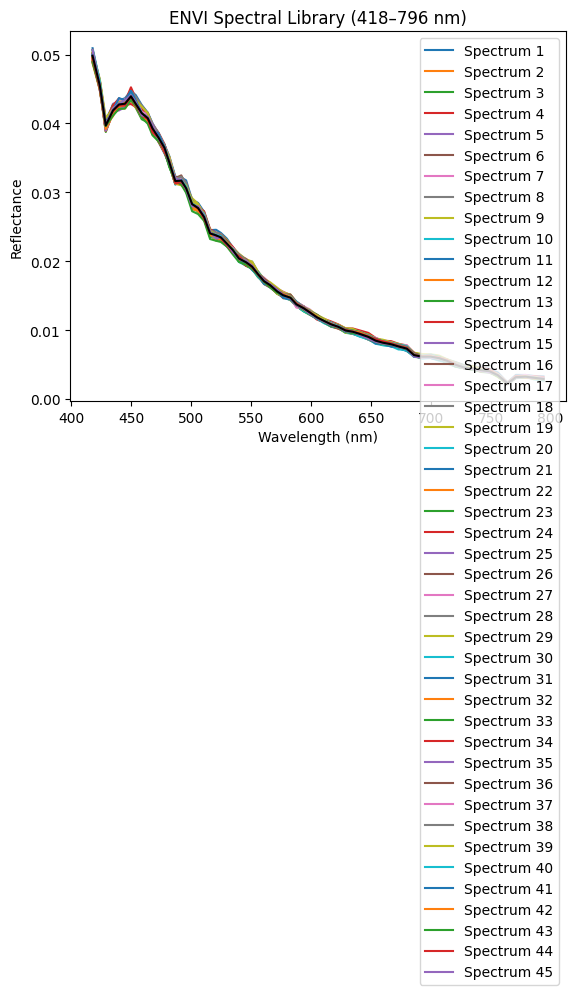

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np

spectra_1 = spectral.io.envi.open('../data/23_04_2025_toa.hdr', '../data/23_04_2025_toa.sli') 
data_1 = spectra_1.spectra  # (n_spectra x n_bands)

header = spectral.envi.read_envi_header('../data/23_04_2025_toa.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]

min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]

filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data_1 = data_1[:, mask]  # Mask langs spektralbånd (aksen 1)

median_data_1 = np.median(np.array(filtered_data_1), axis = 0)
print(median_data_1)
print(filtered_data_1.shape)

# Plotting
for i in range(filtered_data_1.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data_1[i], label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data_1, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()



# Comparison


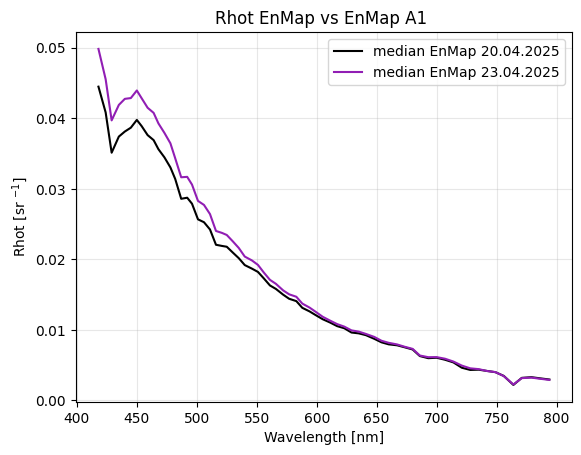

In [ ]:
# EnMap
plt.plot(filtered_wavelengths, median_data, color = "black", linestyle= '-', label = "median EnMap 20.04.2025")
plt.plot(filtered_wavelengths, median_data_1, color = "#911eb4", linestyle= '-', label = "median EnMap 23.04.2025")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr $^{-1}$]") 
plt.title("Rhot EnMap vs EnMap A1 ") 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../plots/EnMap_vs_EnMap_noAc.pdf', dpi=300, bbox_inches='tight')
plt.show()

# land piksel plot

[0.05079145 0.047015   0.04130238 0.04377003 0.04513705 0.04563949
 0.04701213 0.04634038 0.04514764 0.04442151 0.04285701 0.0415707
 0.03971879 0.03793694 0.0349292  0.03541027 0.03434285 0.03204227
 0.0322892  0.03156036 0.02979813 0.03093154 0.03145324 0.03112107
 0.03049275 0.02956996 0.02929399 0.02906497 0.02798539 0.02652135
 0.02603604 0.02461599 0.02409248 0.02365159 0.02236462 0.02161886
 0.02119863 0.02045088 0.01932599 0.01869268 0.01806151 0.01731859
 0.01735489 0.01687123 0.01583772 0.01483759 0.01434681 0.01394454
 0.01345545 0.01326648 0.01245073 0.01531504 0.01989855 0.02225231
 0.02519875 0.02744068 0.03173223 0.03629962 0.03880884 0.0396749
 0.03445721 0.02309392 0.036968   0.04003034 0.03939254 0.03891761]
(12, 66)


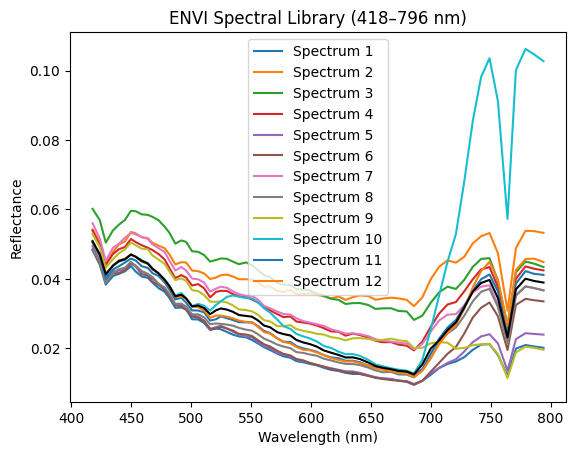

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np

spectra = spectral.io.envi.open('../data/land_no_Ac_23042025.hdr', '../data/land_no_Ac_23042025.sli') 
data = spectra.spectra  

header = spectral.envi.read_envi_header('../data/land_no_Ac_23042025.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]

min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]

filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  

median_data = np.median(np.array(filtered_data), axis = 0)
print(median_data)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data[i], label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()


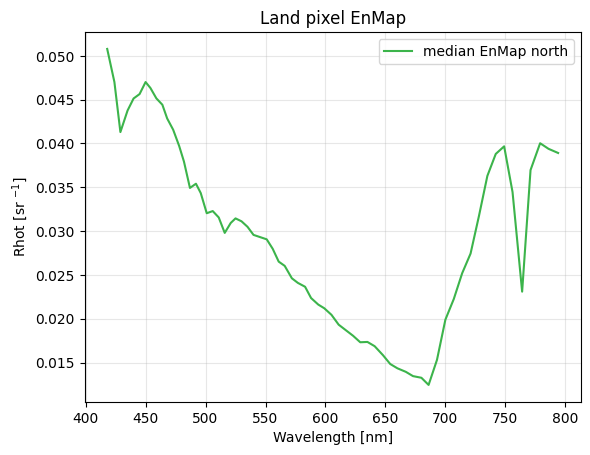

In [ ]:
# EnMap
plt.plot(filtered_wavelengths, median_data, color = "#3cb44b", linestyle= '-', label = "median EnMap north")
#plt.plot(filtered_wavelengths, median_data_1, color = "#e6194b", linestyle= '-', label = "median EnMap south")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr $^{-1}$]") 
plt.title("Land pixel EnMap") 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../plots/land_piksel_noAc.pdf', dpi=300, bbox_inches='tight')
plt.show()